# Sisteme discrete neliniare

$$
\newcommand{\bR}{\mathbb{R}}
\newcommand{\vecv}{\overrightarrow{v}}
$$

Pentru sistemele discrete de forma
$$
\begin{align*}
x_{n+1} & = & f(x_n,y_n) \\
y_{n+1} & = & g(x_n,y_n).
\end{align*}
$$
Avem o situație similară cu cea din cazul continuu. Fie $V:\bR^2 \to \bR^2$, $V(x,y)=\left(f(x,y),g(x,y)\right).$ Presupunem că
$(x^*,y^*)$ este un punct de echilibru, adică 
$$
\begin{align*}
x^*& = & f(x^*,y^*) \\
y^* & = & g(x^*,y^*)
\end{align*}
$$
sau pe scurt $V(x^*,y^*)=(x^*,y^*)$. Calculăm matricea jacobiană în punctul de echilibru
$$
\left.D_V\right|_{\left(x^*,y^*\right)}=\left.\left(\begin{array}{cc} \frac{\partial f}{\partial x} & 
\frac{\partial f}{\partial y}\\ 
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{array}\right)\right|_{\left(x^*,y^*\right)}.
$$
Fie $\lambda_1$ și $\lambda_2$ valorile proprii ale lui $D_V$. Dacă $|\lambda_1|$ și $|\lambda_2|$ sînt ambele diferite de $1$, 
atunci stabilitatea punctului de echilibru este determinată de stabilitatea liniarizării sale. Mai precis:
 - dacă $|\lambda_1|<1$ și $|\lambda_2|<1$ atunci punctul de echilibru este stabil;
 - dacă $|\lambda_1|>1$ și $|\lambda_2|>1$ atunci punctul de echilibru este instabil;
 - dacă una dintre valorile proprii are modulul mai mic decît $1$ și cealaltă îl are mai mare decît $1$, atunci avem un punct șa.

## Exemplu: un model pradă-prădător

Avem un analogi discret al sistemului Lotka-Volerra:
$$
\begin{align*}
x_{n+1} & = & x_n\left(1+r(1-x_n)\right)-sx_ny_n \\
y_{n+1} & = & (1-u)y_n+vx_ny_n.
\end{align*}
$$
Punctele de echilibru sînt $(0,0)$,$(1,0)$ și $(u/v,r/s(1-u/v)).$

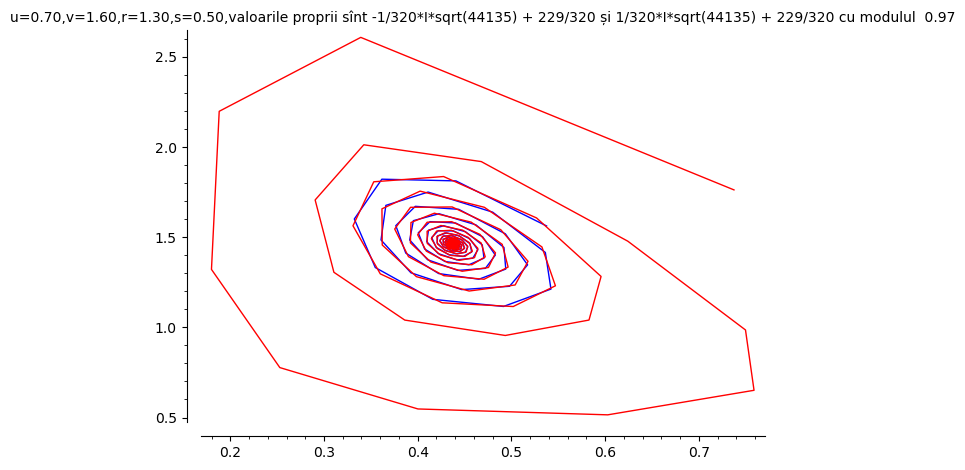

In [61]:
x,y=var('x,y')
r=1.3
s=0.5
u=0.7
v=1.6
f(x,y)=x*(1+r*(1-x))-s*x*y
g(x,y)=(1-u)*y+v*x*y
def sys_orb(init,iter):
    orb=[]
    val=init
    for _ in range(iter):
        orb.append(val)
        x0=val[0]
        y0=val[1]
        x=f(x0,y0)
        y=g(x0,y0)
        val=[x,y]
    return orb
p1=u/v
p2=r/s*(1-u/v)
V=[f(x,y),g(x,y)]
J=jacobian(V,[x,y])(x=p1,y=p2)
l1,l2=J.eigenvalues()
echil=[p1,p2]
init=list(map(lambda c: c+0.1,[p1,p2]))
orb=sys_orb(init,1000)
xs=[orb[i][0] for i in range(len(orb))]
ys=[orb[i][1] for i in range(len(orb))]
pl0=point(echil,size=30,color='red')
pl1=line(zip(xs,ys))
init=[p1+0.3,p2+0.3]
orb=sys_orb(init,1000)
xs=[orb[i][0] for i in range(len(orb))]
ys=[orb[i][1] for i in range(len(orb))]
pl2=line(zip(xs,ys),color='red')
title=f"u={u:.2f},v={v:.2f},r={r:.2f},s={s:.2f},valoarile proprii sînt {l1} și {l2} cu modulul {numerical_approx(l1.abs()): .2f}"
(pl0+pl1+pl2).show(title=title)


-1/120*sqrt(10465) + 29/120


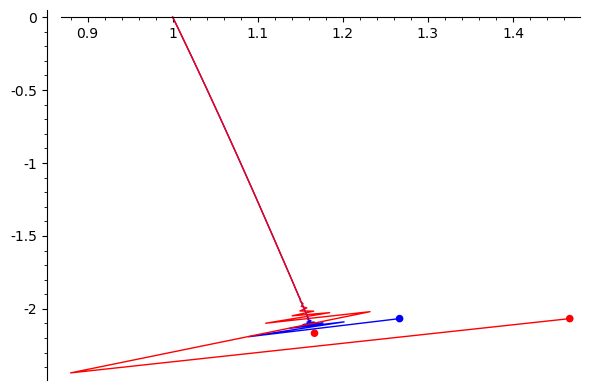

[1.16666666666667, -2.16666666666667]


In [6]:
x,y=var('x,y')
r=1.3
s=0.1
u=0.7
v=0.6
f(x,y)=x*(1+r*(1-x))-s*x*y
g(x,y)=(1-u)*y+v*x*y
def sys_orb(init,iter):
    orb=[]
    val=init
    for _ in range(iter):
        orb.append(val)
        x0=val[0]
        y0=val[1]
        x=f(x0,y0)
        y=g(x0,y0)
        val=[x,y]
    return orb
p1=u/v
p2=r/s*(1-u/v)
V=[f(x,y),g(x,y)]
J=jacobian(V,[x,y])(x=p1,y=p2)
l1,l2=J.eigenvalues()
print(l1)
echil=[p1,p2]
init=list(map(lambda c: c+0.1,[p1,p2]))
orb=sys_orb(init,1000)
xs=[orb[i][0] for i in range(len(orb))]
ys=[orb[i][1] for i in range(len(orb))]
pl0=point(echil,size=30,color='red')
pl3=point(init,size=30,color='blue')
pl1=line(zip(xs,ys))
init=[p1+0.3,p2+0.1]
pl4=point(init,size=30,color='red')
orb=sys_orb(init,1000)
xs=[orb[i][0] for i in range(len(orb))]
ys=[orb[i][1] for i in range(len(orb))]
pl2=line(zip(xs,ys),color='red')
#title=f"u={u:.2f},v={v:.2f},r={r:.2f},s={s:.2f},valoarile proprii sînt {l1} și {l2} cu \
#modulele {numerical_approx(l1.abs()): .2f} și {numerical_approx(l2.abs()): .2f} "
(pl0+pl1+pl2+pl3+pl4).show()
print(echil)

## Elemente de statistică descriptivă

Statistica descriptivă este o colecție de tehnici care ne permit să extragem informații despre datele numerice pe care le 
obținem în urma unei serii de experimente sau unei serii de măsurători. Obiectele care sînt măsurate se numesc **indivizi**, iar 
proprietățile care sînt măsurate se numesc **variabile**. 

Variabilele sînt de mai multe tipuri:
 - **categoriale**: descriu apartenența la diferite categorii. De exemplu notele, genotipul, prezența sau absența unei boli. 
   Dacă valorile au o ordine naturală, atunci variabilele se numesc **ordinale**. Altfel se numesc **nominale**;
 - **numerice**: variabilele iau valori numerice care pot fi ordonate și asupra cărora are sens să facem operații aritmetice. 
   Variabilelele numerice pot fi **discrete** sau **continue**, în funcție de valorile posibile. Variabilele discrete iau valori
   într-o submulțime discretă (de exemplu $\mathbb{N}$ sau $\mathbb{Z}$) iar cele continue într-un interval de numere reale.
   
Un exemplu de variabile categoriale este apare în experimentele lui Gregor Mendel cu plantele de mazăre. Una dintre trăsăturile
urmărite era poziția florilor: axială sau terminală. Cum nu avem nici o posibilitate de ordonare avem variabile nominale.

Atunci cînd studiem variabile numerice avem multe valori posibile și multe structuri care pot apărea. Ca să studiem astfel de 
variabile o primă mărime care ne interesează este "mijlocul" mulțimii de valori. Avem mai multe metode de identificare a 
acestuia:
  - Fie $x_1,\dots,x_n$ o mulțime de valori. **Media** lor este
    $$
    \overline{x}=\frac{x_1+\dots+x_n}{n}.
    $$
  - O altă măsură a centralității este **mediana**. Dacă numărul de variabile este impar este egală cu valoarea din mijloc, iar
    dacă numărul este par este media aritmetică a valorilor din mijloc.
  - O a treia măsură a tendinței centrale este **modulul**. Acesta este valoarea variabilei care apare cel mai des.

Spre exemplu luăm ca mulțime a valorilor cantitatea de paraziți pe un număr de libelule $\left\{5,0,0,54,5,12,27,24,36,5,56,43,
15,42,12,62,36,34,58,23\right\}$. Atunci media este $27,45$, mediana este $25,5$ și modulul este $5$.

Mărimile "centrale" dau valorile spre care se concentrează variabilele. Un alt aspect important este **variabilitatea**, 
adică felul în care valorile se îndepărtează de medie.  Spre exemplu ambele mulțimi de valori:
$$
\begin{align*}
\left\{50, 58, 78, 81, 93\right\} \\
\left\{72, 71, 72, 72, 73\right\}
\end{align*}
$$
au media $72$, dar în mod clar prima este mult mai dispersată decît a doua. Măsurile dispersiei sînt:
 - **deviația standard**: Dacă $x_1,\dots,x_n$ este o mulțime de valori cu media $\overline{x}$, atunci
   $$
   d.s. = \sqrt{\frac{1}{n}\left(\left(\overline{x}-x_1\right)^2+\dots+\left(\overline{x}-x_n\right)^2\right)}.   
   $$
 - **varianța** este pătratul deviației standard.
 
Un alt indicator al variabilității este dat de valorile minimă și maximă. De asemenea putem lua mediana primei jumătăți a 
mulțimii numită **primul sfert** ($Q_1$), precum și mijlocul celei de-a doua jumătăți, numită **al treilea sfert** ($Q_3$).

Avem sumarul cu $5-$numere a variabilelor: min, $Q_1$, mediana, $Q_3$, max. De la ele putem calcula cîteva măsuri ale întinderii
datelor: întinderea datelor este $r=max-min$. De asemenea avem întinderea între sferturi (IQR) $IQR=Q_3-Q_1$. 

Adesea datele colectate în științele vieții conțin date **aberante**, adică date foarte îndepărtate de mediană. Acestea pot
proveni din erori de măsurare sau să fie datorate variabilității naturale. Se admite că o valoare este aberantă dacă este la cu mai mult decît $1.5\cdot IQR$ deasupra lui $Q_3$ sau mai mult decît $1.5\cdot IQR$ sub $Q_1.$

In [12]:
import numpy as np
import statistics as st
lst=[5,0,0,54,5,12,27,24,36,5,56,43,15,42,12,62,36,34,58,23]
print(np.mean(lst))
print(np.median(lst[0:len(lst)/2]))
print(np.median(lst))
print(np.median(lst[len(lst)/2:len(lst)-1]))
print(st.mode(lst))
print(np.std(lst))

27.45
8.5
25.5
42.0
5
19.96615886944707


 Datele pot fi reprezentate grafic cu ajutorul unui box plot precum mai jos, unde vedem cele cinci numere care caracterizează 
 setul nostru:

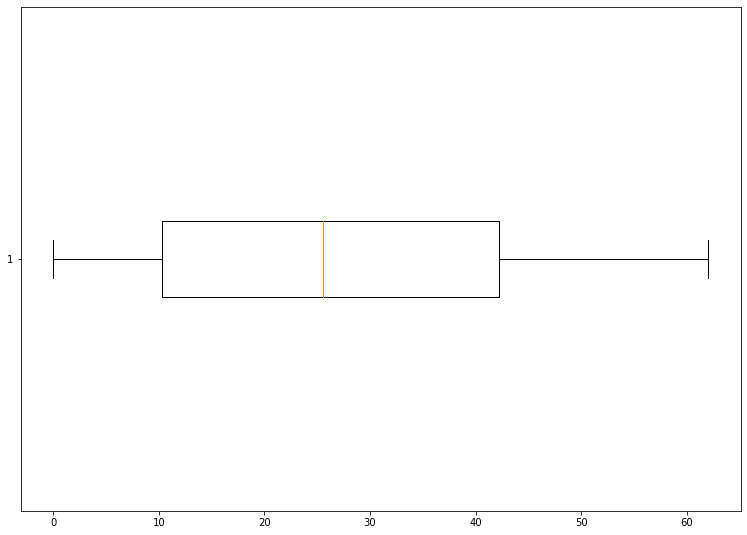

In [13]:
import matplotlib.pyplot as plt
import numpy as np
data=[5,0,0,54,5,12,27,24,36,5,56,43,15,42,12,62,36,34,58,23]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
w=float(0.6)
bp = ax.boxplot(data,vert=False)
# show plot
plt.show()

Pentru datele categoriale avem de asemenea mai multe posibilități de reprezentare. Primul este cu ajutorul unui **grafic de 
bare**. Avem cîte o bară pentru fiecare categorie, iar lungimea sa este proporțională cu numărul de indivizi din fiecare 
categorie. Un exemplu pentru localizarea cancerelor HPV este:

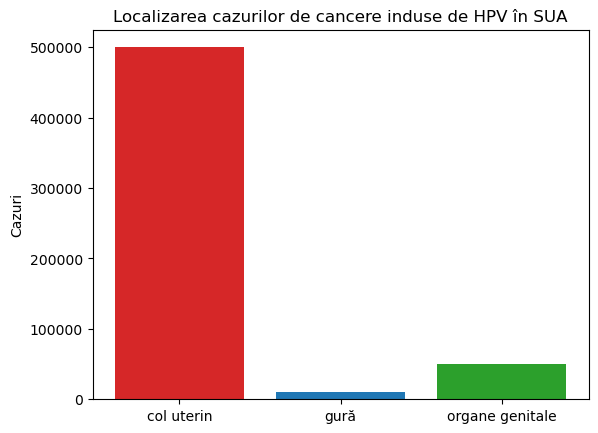

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

locatii = ['col uterin', 'gură', 'organe genitale']
counts = [500000, 10000, 50000]
bar_labels = ['red', 'blue', 'green',]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(locatii, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Cazuri')
ax.set_title('Localizarea cazurilor de cancere induse de HPV în SUA')
#ax.legend(title='Fruit color')

plt.show()

O altă metodă de vizualizare este **graficul proporților (pie chart)**. Aceasta este un cerc împărțit în sectoare, cîte unul pentru fiecare categorie. Unghiul central și deci aria fiecărui sector este proporțional cu numărul de indivizi din fiecare 
categorie. De exemplu datele pentru mortalitatea SARS în perioada 2002-2003 pot fi prezentate astfel:

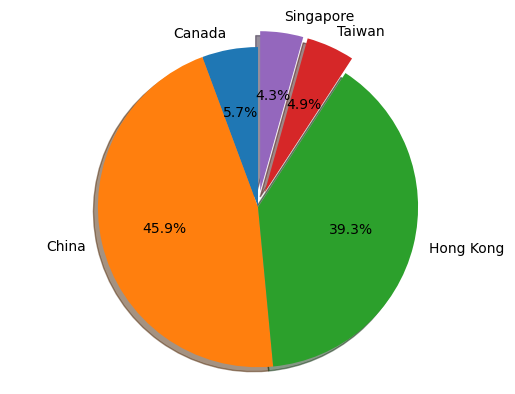

In [47]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Canada', 'China', 'Hong Kong', 'Taiwan', 'Singapore'
sizes = [43, 349, 299, 37,33]
explode = (0, 0, 0, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Pentru variabilele numerice vizualizarea se face cu ajutorul **histogramelor**. O histogramă este formată din dreptunghiuri 
cu baze egale, numite **cutii**. Înălțimea fiecărui dreptunghi este proporțională cu numărul de indivizi din fiecare cutie. 
Valoarea concretă a înălțimii este determinată în mai multe situații:
  - pentru **histograme de frecvență** înălțimea este egală cu numărul de inidivizi în fiecare cutie;
  - pentru **histograme de frecvență relativă** înălțimea este proporțională cu numărul de indivizi din cutie;
  - pentru **histograme de densitate** înălțimea este aleasă astfel încît aria dreptunghiului este proporțională cu numărul de       indivizi din fiecare cutie.

Indiferent de convenția folosită, histogramele au aceeași formă. În general nu există nici un criteriu clar pentru a calcula 
mărimea unei cutii, dar există anumite reguli. Printre ele regula lui Sturges: calculăm numărul natural $k$, cel mai aproape de 
$1+\log_2n$, unde $n$ este numărul de puncte. Atunci dacă $R$ este întinderea datelor, luăm numărul de cutii $R/k$.

Histograma de densitate este adesea cea mai convenabilă, astfel mediana este localizată la valoarea care împarte aria totală
a histogramei în jumătate.



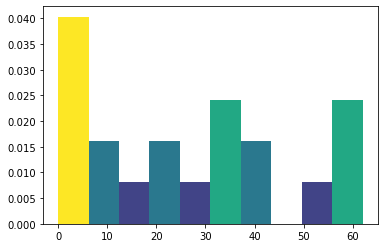

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

data=[5,0,0,54,5,12,27,24,36,5,56,43,15,42,12,62,36,34,58,23]
n_bins=10
N, bins, patches = plt.hist(data, bins=n_bins,density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

#plt.hist(data,bins=n_bins,density=True)

Adesea este util să aproximăm datele discrete precum o histogramă printr-o funcție continuă. Histograma de mai jos reprezintă 
valorile pulsului unor pacienți internați la terapie intensivă. Funcția care aproximează histograma este funcția normală:
$$
f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}.
$$
Această funcție are un singur punct de maxim în $0$. Ca să adaptăm funcția la situația noastră introducem doi parametri $\mu$ și
$\sigma$, numite **centru**, respectiv **dispersie**:
$$
f(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}.
$$

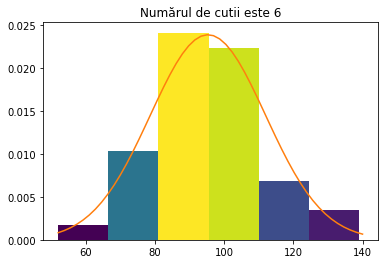

95.3
16.690116836020053
52
6.321928094887363


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

plt.clf()

data2=[52,68,69,70,78,78,79,81,83,88,88,88,88,89,89,89,92,92,95,95,95,98,98,98,99,99,101,101,103,106,108,108,109,109,113,115,115,
119,128,139]
mu=np.mean(data2)
s=np.std(data2)
def f(x):
    return 1/(s*sqrt(2*pi))*exp(-(x-mu)^2/(2*s^2))
xs=np.linspace(52,140)
ys=list(map(f,xs))


n_bins=6
N, bins, patches = plt.hist(data2, bins=n_bins,density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.plot(xs,ys)
plt.title(f"Numărul de cutii este {n_bins}")
plt.show()
print(mu)
print(s)
print(min(data2))
n=len(data2)
k=1+log(n,2)
print(float(k))

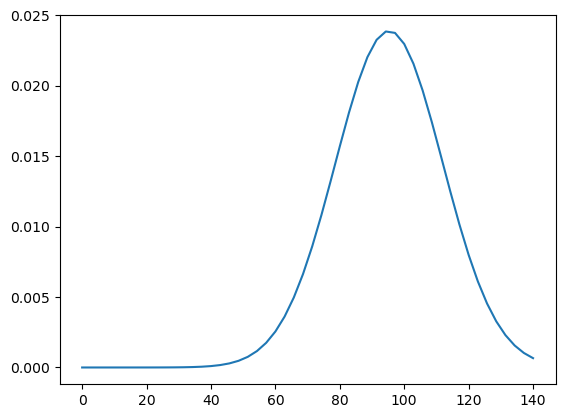

In [21]:
plt.plot(xs,ys)
plt.show()

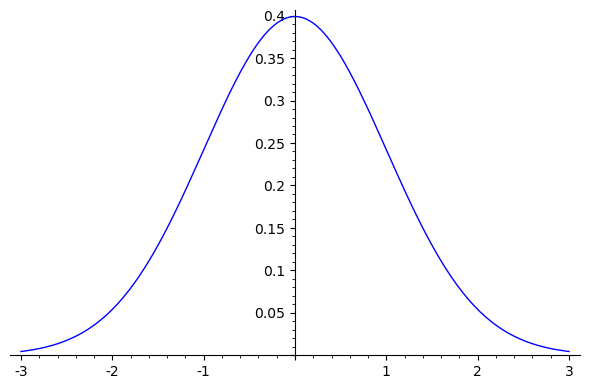

In [24]:
x=var('x')
f(x)=1/(sqrt(2*pi))*exp(-(x)^2/2)
plot(f,(-3,3))
